


*   Erick Axel Martinez Rios A01331212

*   November 20th, 2020 

*   Applied Computing 

*   Final project 

*   Testing of the model 















Upload DATABASE CSV FILE and Actual_Results_FINAL csv FILE 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Actual_Results_Final.csv to Actual_Results_Final (1).csv
Saving data.csv to data (1).csv


The CSV file imported here came from the real outcome of the fights according to the UFC stats website http://ufcstats.com/

In [ ]:
import io
import numpy as np #Library to manage arrays 
import pandas as pd #Lirary for mange dataframes 
import matplotlib.pyplot as plt # Library to make plots. 
#Import csv into a dataframe 
df = pd.read_csv(io.BytesIO(uploaded['data.csv'])) 
print("Complete Data shape:", df.shape) 
print("Data shape withput NA values",df.dropna().shape)

Complete Data shape: (5144, 145)
Data shape withput NA values (3202, 145)


In [ ]:
actual_values = pd.read_csv(io.BytesIO(uploaded['Actual_Results_Final.csv'])) 

In [ ]:
df_n = df.dropna(axis = 0, how ='any') 
print(df_n.shape)

(3202, 145)


In [ ]:
print('R_fighter numbers:',df_n['R_fighter'].value_counts().shape[0])
print('B_fighter numbers:',df_n['B_fighter'].value_counts().shape[0])
print('Referee numbers:',df_n['Referee'].value_counts().shape[0])
print('date:',df_n['date'].value_counts().shape[0])
print('location:',df_n['location'].value_counts().shape[0])
print('weight_class:',df_n['weight_class'].value_counts().shape[0])
print('R_Stance:',df_n['R_Stance'].value_counts().shape[0])
print('B_Stance:',df_n['B_Stance'].value_counts().shape[0])

R_fighter numbers: 875
B_fighter numbers: 1048
Referee numbers: 166
date: 445
location: 146
weight_class: 13
R_Stance: 4
B_Stance: 4


In [ ]:
df_n = df_n.drop(['R_fighter', 'B_fighter', 'Referee', 'date', 'location'], axis=1)
#df_n['R_fighter'] = df_n['R_fighter'].astype('category').cat.codes
#df_n['B_fighter'] = df_n['B_fighter'].astype('category').cat.codes
#df_n['location'] = df_n['location'].astype('category').cat.codes
#f_n['Referee'] = df_n['Referee'].astype('category').cat.codes
#df_n['date'] = df_n['date'].astype('category').cat.codes
df_n['title_bout'] = df_n["title_bout"].astype('category').cat.codes
df_n = pd.get_dummies(df_n, columns=['R_Stance', 'B_Stance', 'weight_class'])
print(df_n.head())
print(df_n.shape)

  Winner  ...  weight_class_Women's Strawweight
0    Red  ...                                 0
1    Red  ...                                 0
2    Red  ...                                 0
3   Blue  ...                                 0
4   Blue  ...                                 0

[5 rows x 158 columns]
(3202, 158)


In [ ]:
df_filtered = df_n
# Select input variables and separate target variable 
features = df_filtered.loc[:,  df_n.columns != 'Winner']
print(features.shape)

(3202, 157)


*Train* decision tree model with the inputs stats from the GINI importance criteria 

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import classification_report #Library for classification report 
from sklearn.metrics import confusion_matrix # Library to generate the confusion matrix of the model. 
#This are the final predictors that will be tested for the model 
inputs = ['R_age', 'R_avg_opp_SIG_STR_pct', 'R_avg_opp_SIG_STR_landed',
       'B_avg_DISTANCE_landed', 'B_avg_SIG_STR_att', 'R_avg_opp_HEAD_landed',
       'B_age', 'B_avg_opp_TOTAL_STR_landed', 'R_avg_opp_TOTAL_STR_landed',
       'B_avg_HEAD_att', 'R_avg_GROUND_att', 'B_avg_opp_SIG_STR_pct',
       'B_avg_BODY_att', 'R_avg_GROUND_landed', 'R_avg_opp_DISTANCE_landed']

print(inputs)

dt_final =df_filtered[inputs]

X = dt_final.values
y = df_filtered.loc[:,['Winner']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1234) # 80% training and 20% test

print(X_train.shape, X_test.shape)
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="gini", max_depth=6)
# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)
#Predict the response for test dataset
print('Accuracy of Decision Tree classifier on training set: {:.4f}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.4f}'
     .format(dt.score(X_test, y_test)))

pred = dt.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

report = classification_report(y_test, pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv("Report_DT_RFF_FINAL.csv")


f = dt.predict_proba(X_test) 

prob_DF =  pd.DataFrame(f, columns=dt.classes_)

prob_DF.head(10)

['R_age', 'R_avg_opp_SIG_STR_pct', 'R_avg_opp_SIG_STR_landed', 'B_avg_DISTANCE_landed', 'B_avg_SIG_STR_att', 'R_avg_opp_HEAD_landed', 'B_age', 'B_avg_opp_TOTAL_STR_landed', 'R_avg_opp_TOTAL_STR_landed', 'B_avg_HEAD_att', 'R_avg_GROUND_att', 'B_avg_opp_SIG_STR_pct', 'B_avg_BODY_att', 'R_avg_GROUND_landed', 'R_avg_opp_DISTANCE_landed']
(2561, 15) (641, 15)
Accuracy of Decision Tree classifier on training set: 0.6790
Accuracy of Decision Tree classifier on test set: 0.6365
[[ 62   1 158]
 [  1   0   6]
 [ 67   0 346]]
              precision    recall  f1-score   support

        Blue       0.48      0.28      0.35       221
        Draw       0.00      0.00      0.00         7
         Red       0.68      0.84      0.75       413

    accuracy                           0.64       641
   macro avg       0.39      0.37      0.37       641
weighted avg       0.60      0.64      0.60       641



,Blue,Draw,Red
0,0.215789,0.010526,0.773684
1,0.402597,0.000000,0.597403
2,0.035971,0.000000,0.964029
3,0.206897,0.000000,0.793103
4,0.268817,0.032258,0.698925
5,0.402597,0.000000,0.597403
6,0.495536,0.026786,0.477679
7,0.495536,0.026786,0.477679
8,0.402597,0.000000,0.597403
9,0.485000,0.016667,0.498333


Matches to test 

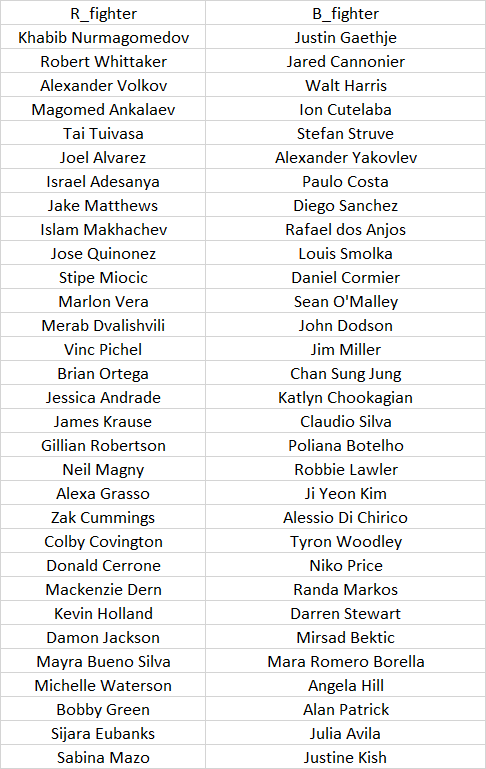

Take input features from database to perform to compute the avarage of the stats for each of the fighters 

In [ ]:
check_R = 'R_'
res_R = [idx for idx in inputs if idx.lower().startswith(check_R.lower())] 
res_R.insert(0,'R_fighter')
res_R.append('date')
print(res_R)
check_B = 'B_'
res_B = [idx for idx in inputs if idx.lower().startswith(check_B.lower())] 
res_B.insert(0,'B_fighter')
res_B.append('date')
print(res_B)
input_dat = df
R_stats = input_dat[res_R]
B_stats = input_dat[res_B]
actual_year = 2020 

['R_fighter', 'R_age', 'R_avg_opp_SIG_STR_pct', 'R_avg_opp_SIG_STR_landed', 'R_avg_opp_HEAD_landed', 'R_avg_opp_TOTAL_STR_landed', 'R_avg_GROUND_att', 'R_avg_GROUND_landed', 'R_avg_opp_DISTANCE_landed', 'date']
['B_fighter', 'B_avg_DISTANCE_landed', 'B_avg_SIG_STR_att', 'B_age', 'B_avg_opp_TOTAL_STR_landed', 'B_avg_HEAD_att', 'B_avg_opp_SIG_STR_pct', 'B_avg_BODY_att', 'date']


Match 1

 Khabib Nurmagomedov	vs	Justin Gaethje

In [ ]:
# Khabib Nurmagomedov	vs	Justin Gaethje (W:Khabib Nurmagomedov)	
match_1_R = R_stats.loc[R_stats['R_fighter'] == 'Khabib Nurmagomedov'].reset_index(drop=True)
years = actual_year - int(match_1_R.loc[0,'date'].split("-")[0]) 
n_years = match_1_R.loc[0,'R_age'] + years
match_1_R_mean = match_1_R.mean(skipna = True)
match_1_R_mean.loc['R_age'] = n_years
match_1_B = B_stats.loc[B_stats['B_fighter'] == 'Justin Gaethje'].reset_index(drop=True)
years = actual_year - int(match_1_B.loc[0,'date'].split("-")[0])
n_years = match_1_B.loc[0,'B_age'] + years 
match_1_B_mean = match_1_B.mean(skipna = True)
match_1_B_mean.loc['B_age'] = n_years
match_1_input =  pd.concat([match_1_R_mean,match_1_B_mean])
match_1_input = pd.DataFrame(match_1_input).T
match_1_input = match_1_input[inputs]
f1 = dt.predict_proba(match_1_input.values) 
prob_DF_1 =  pd.DataFrame(f1, columns=dt.classes_)
print("Probability of winning")
prob_DF_1.head(1)

Probability of winning


,Blue,Draw,Red
0,0.153846,0.009615,0.836538


In [ ]:
m1b = dt.predict(match_1_input.values) 
print(m1b)

['Red']


Match 2

In [ ]:
#Robert Whittaker	vs	Jared Cannonier	(W:)
match_2_R = R_stats.loc[R_stats['R_fighter'] == 'Robert Whittaker'].reset_index(drop=True)
years = actual_year - int(match_2_R.loc[0,'date'].split("-")[0]) 
n_years = match_2_R.loc[0,'R_age'] + years
match_2_R_mean = match_2_R.mean(skipna = True)
match_2_R_mean.loc['R_age'] = n_years
match_2_B = B_stats.loc[B_stats['B_fighter'] == 'Jared Cannonier'].reset_index(drop=True)
years = actual_year - int(match_2_B.loc[0,'date'].split("-")[0])
n_years = match_2_B.loc[0,'B_age'] + years 
match_2_B_mean = match_2_B.mean(skipna = True)
match_2_B_mean.loc['B_age'] = n_years
match_2_input =  pd.concat([match_2_R_mean,match_2_B_mean])
match_2_input = pd.DataFrame(match_2_input).T
match_2_input = match_2_input[inputs]
f2 = dt.predict_proba(match_2_input.values) 
prob_DF_2 =  pd.DataFrame(f2, columns=dt.classes_)
prob_DF_2.head(1)

,Blue,Draw,Red
0,0.402597,0.0,0.597403


In [ ]:
m1b = dt.predict(match_2_input.values) 
print(m1b)

['Red']


Match 3 

In [ ]:
# Alexander Volkov	vs	Walt Harris	
match_3_R = R_stats.loc[R_stats['R_fighter'] == 'Alexander Volkov'].reset_index(drop=True)
years = actual_year - int(match_3_R.loc[0,'date'].split("-")[0]) 
n_years = match_3_R.loc[0,'R_age'] + years
match_3_R_mean = match_3_R.mean(skipna = True)
match_3_R_mean.loc['R_age'] = n_years
match_3_B = B_stats.loc[B_stats['B_fighter'] == 'Walt Harris'].reset_index(drop=True)
years = actual_year - int(match_3_B.loc[0,'date'].split("-")[0])
n_years = match_3_B.loc[0,'B_age'] + years 
match_3_B_mean = match_3_B.mean(skipna = True)
match_3_B_mean.loc['B_age'] = n_years
match_3_input =  pd.concat([match_3_R_mean,match_3_B_mean])
match_3_input = pd.DataFrame(match_3_input).T
match_3_input = match_3_input[inputs]
f3 = dt.predict_proba(match_3_input.values) 
prob_DF_3 =  pd.DataFrame(f3, columns=dt.classes_)
prob_DF_3.head(1)

,Blue,Draw,Red
0,0.402597,0.0,0.597403


In [ ]:
m1b = dt.predict(match_3_input.values) 
print(m1b)

['Red']


Match 4

In [ ]:
# Magomed Ankalaev	vs	Ion Cutelaba	###Ok 
match_4_R = R_stats.loc[R_stats['R_fighter'] == 'Magomed Ankalaev'].reset_index(drop=True)
years = actual_year - int(match_4_R.loc[0,'date'].split("-")[0]) 
n_years = match_4_R.loc[0,'R_age'] + years
match_4_R_mean = match_4_R.mean(skipna = True)
match_4_R_mean.loc['R_age'] = n_years
match_4_B = B_stats.loc[B_stats['B_fighter'] == 'Ion Cutelaba'].reset_index(drop=True)
years = actual_year - int(match_4_B.loc[0,'date'].split("-")[0])
n_years = match_4_B.loc[0,'B_age'] + years 
match_4_B_mean = match_4_B.mean(skipna = True)
match_4_B_mean.loc['B_age'] = n_years
match_4_input =  pd.concat([match_4_R_mean,match_4_B_mean])
match_4_input = pd.DataFrame(match_4_input).T
match_4_input = match_4_input[inputs]
f4 = dt.predict_proba(match_4_input.values) 
prob_DF_4 =  pd.DataFrame(f4, columns=dt.classes_)
prob_DF_4.head(1)

,Blue,Draw,Red
0,0.387097,0.032258,0.580645


In [ ]:
m1b = dt.predict(match_4_input.values) 
print(m1b)

['Red']


Match 5

In [ ]:
# Tai Tuivasa	vs	Stefan Struve		
match_5_R = R_stats.loc[R_stats['R_fighter'] == 'Tai Tuivasa'].reset_index(drop=True)
years = actual_year - int(match_5_R.loc[0,'date'].split("-")[0]) 
n_years = match_5_R.loc[0,'R_age'] + years
match_5_R_mean = match_5_R.mean(skipna = True)
match_5_R_mean.loc['R_age'] = n_years
match_5_B = B_stats.loc[B_stats['B_fighter'] == 'Stefan Struve'].reset_index(drop=True)
years = actual_year - int(match_5_B.loc[0,'date'].split("-")[0])
n_years = match_5_B.loc[0,'B_age'] + years 
match_5_B_mean = match_5_B.mean(skipna = True)
match_5_B_mean.loc['B_age'] = n_years
match_5_input =  pd.concat([match_5_R_mean,match_5_B_mean])
match_5_input = pd.DataFrame(match_5_input).T
match_5_input = match_5_input[inputs]
f5 = dt.predict_proba(match_5_input.values) 
prob_DF_5 =  pd.DataFrame(f5, columns=dt.classes_)
prob_DF_5.head(1)

,Blue,Draw,Red
0,0.130435,0.0,0.869565


In [ ]:
m1b = dt.predict(match_5_input.values) 
print(m1b)

['Red']


Match 6 

In [ ]:
# Joel Alvarez	vs	Alexander Yakovlev	(Winner Joel Alvarez)
match_6_R = R_stats.loc[R_stats['R_fighter'] == 'Joel Alvarez'].reset_index(drop=True)
years = actual_year - int(match_6_R.loc[0,'date'].split("-")[0]) 
n_years = match_6_R.loc[0,'R_age'] + years
match_6_R_mean = match_6_R.mean(skipna = True)
match_6_R_mean.loc['R_age'] = n_years
match_6_B = B_stats.loc[B_stats['B_fighter'] == 'Alexander Yakovlev'].reset_index(drop=True)
years = actual_year - int(match_6_B.loc[0,'date'].split("-")[0])
n_years = match_6_B.loc[0,'B_age'] + years 
match_6_B_mean = match_6_B.mean(skipna = True)
match_6_B_mean.loc['B_age'] = n_years
match_6_input =  pd.concat([match_6_R_mean,match_6_B_mean])
match_6_input = pd.DataFrame(match_6_input).T
match_6_input = match_6_input[inputs]
f6 = dt.predict_proba(match_6_input.values) 
prob_DF_6 =  pd.DataFrame(f6, columns=dt.classes_)
prob_DF_6.head(1)

,Blue,Draw,Red
0,0.402597,0.0,0.597403


In [ ]:
m1b = dt.predict(match_6_input.values) 
print(m1b)

['Red']


Match 7 

In [ ]:
# Israel Adesanya	vs	Paulo Costa	 (Winner Israel)
match_7_R = R_stats.loc[R_stats['R_fighter'] == 'Israel Adesanya'].reset_index(drop=True)
years = actual_year - int(match_7_R.loc[0,'date'].split("-")[0]) 
n_years = match_7_R.loc[0,'R_age'] + years
match_7_R_mean = match_7_R.mean(skipna = True)
match_7_R_mean.loc['R_age'] = n_years
match_7_B = B_stats.loc[B_stats['B_fighter'] == 'Paulo Costa'].reset_index(drop=True)
years = actual_year - int(match_7_B.loc[0,'date'].split("-")[0])
n_years = match_7_B.loc[0,'B_age'] + years 
match_7_B_mean = match_7_B.mean(skipna = True)
match_7_B_mean.loc['B_age'] = n_years
match_7_input =  pd.concat([match_7_R_mean,match_7_B_mean])
match_7_input = pd.DataFrame(match_7_input).T
match_7_input = match_7_input[inputs]
f7 = dt.predict_proba(match_7_input.values) 
prob_DF_7 =  pd.DataFrame(f7, columns=dt.classes_)
prob_DF_7.head(1)

,Blue,Draw,Red
0,0.485,0.016667,0.498333


In [ ]:
m1b = dt.predict(match_7_input.values) 
print(m1b)

['Red']


Match 8 

In [ ]:
# Jake Matthews	vs	Diego Sanchez (Winner Jake Matthews)
match_8_R = R_stats.loc[R_stats['R_fighter'] == 'Jake Matthews'].reset_index(drop=True)
years = actual_year - int(match_8_R.loc[0,'date'].split("-")[0]) 
n_years = match_8_R.loc[0,'R_age'] + years
match_8_R_mean = match_8_R.mean(skipna = True)
match_8_R_mean.loc['R_age'] = n_years
match_8_B = B_stats.loc[B_stats['B_fighter'] == 'Diego Sanchez'].reset_index(drop=True)
years = actual_year - int(match_8_B.loc[0,'date'].split("-")[0])
n_years = match_8_B.loc[0,'B_age'] + years 
match_8_B_mean = match_8_B.mean(skipna = True)
match_8_B_mean.loc['B_age'] = n_years
match_8_input =  pd.concat([match_8_R_mean,match_8_B_mean])
match_8_input = pd.DataFrame(match_8_input).T
match_8_input = match_8_input[inputs]
f8 = dt.predict_proba(match_8_input.values) 
prob_DF_8 =  pd.DataFrame(f8, columns=dt.classes_)
prob_DF_8.head(1)

,Blue,Draw,Red
0,0.206897,0.0,0.793103


In [ ]:
m1b = dt.predict(match_8_input.values) 
print(m1b)

['Red']


Match 9 

In [ ]:
# Islam Makhachev	vs	Rafael Dos Anjos	
match_9_R = R_stats.loc[R_stats['R_fighter'] == 'Islam Makhachev'].reset_index(drop=True)
years = actual_year - int(match_9_R.loc[0,'date'].split("-")[0]) 
n_years = match_9_R.loc[0,'R_age'] + years
match_9_R_mean = match_9_R.mean(skipna = True)
match_9_R_mean.loc['R_age'] = n_years

match_9_B = B_stats.loc[B_stats['B_fighter'] == 'Rafael Dos Anjos'].reset_index(drop=True)
years = actual_year - int(match_9_B.loc[0,'date'].split("-")[0])
n_years = match_9_B.loc[0,'B_age'] + years 
match_9_B_mean = match_9_B.mean(skipna = True)
match_9_B_mean.loc['B_age'] = n_years

match_9_input =  pd.concat([match_9_R_mean,match_9_B_mean])
match_9_input = pd.DataFrame(match_9_input).T
match_9_input = match_9_input[inputs]

f9 = dt.predict_proba(match_9_input.values) 
prob_DF_9 =  pd.DataFrame(f9, columns=dt.classes_)
prob_DF_9.head(1)

,Blue,Draw,Red
0,0.215789,0.010526,0.773684


In [ ]:
m1b = dt.predict(match_9_input.values) 
print(m1b)

['Red']


Mtach 10 

In [ ]:
# Jose Quinonez	vs	Louis Smolka	
match_10_R = R_stats.loc[R_stats['R_fighter'] == 'Jose Quinonez'].reset_index(drop=True)
years = actual_year - int(match_10_R.loc[0,'date'].split("-")[0]) 
n_years = match_10_R.loc[0,'R_age'] + years
match_10_R_mean = match_10_R.mean()
match_10_R_mean.loc['R_age'] = n_years
match_10_B = B_stats.loc[B_stats['B_fighter'] == 'Louis Smolka'].reset_index(drop=True)
years = actual_year - int(match_10_B.loc[0,'date'].split("-")[0])
n_years = match_10_B.loc[0,'B_age'] + years 
match_10_B_mean = match_10_B.mean()
match_10_B_mean.loc['B_age'] = n_years
match_10_input =  pd.concat([match_10_R_mean,match_10_B_mean])
match_10_input = pd.DataFrame(match_10_input).T
match_10_input = match_10_input[inputs]
f10 = dt.predict_proba(match_10_input.values) 
prob_DF_10 =  pd.DataFrame(f10, columns=dt.classes_)
prob_DF_10.head(1)

,Blue,Draw,Red
0,0.485,0.016667,0.498333


In [ ]:
m1b = dt.predict(match_10_input.values) 
print(m1b)

['Red']


Match 11

In [ ]:
# Stipe Miocic	vs	Daniel Cormier (Winner: Miomic)
match_11_R = R_stats.loc[R_stats['R_fighter'] == 'Stipe Miocic'].reset_index(drop=True)
years = actual_year - int(match_11_R.loc[0,'date'].split("-")[0]) 
n_years = match_11_R.loc[0,'R_age'] + years
match_11_R_mean = match_11_R.mean()
match_11_R_mean.loc['R_age'] = n_years
match_11_B = B_stats.loc[B_stats['B_fighter'] == 'Daniel Cormier'].reset_index(drop=True)
years = actual_year - int(match_11_B.loc[0,'date'].split("-")[0])
n_years = match_11_B.loc[0,'B_age'] + years 
match_11_B_mean = match_11_B.mean()
match_11_B_mean.loc['B_age'] = n_years
match_11_input =  pd.concat([match_11_R_mean,match_11_B_mean])
match_11_input = pd.DataFrame(match_11_input).T
match_11_input = match_11_input[inputs]
f11 = dt.predict_proba(match_11_input.values) 
prob_DF_11 =  pd.DataFrame(f11, columns=dt.classes_)
prob_DF_11.head(1)

,Blue,Draw,Red
0,0.333333,0.011494,0.655172


In [ ]:
m1b = dt.predict(match_11_input.values) 
print(m1b)

['Red']


Match 12 Checar 

In [ ]:
# Marlon Vera	vs	Sean O'Malley	
match_12_R = R_stats.loc[R_stats['R_fighter'] == 'Marlon Vera'].reset_index(drop=True)
years = actual_year - int(match_12_R.loc[0,'date'].split("-")[0]) 
n_years = match_12_R.loc[0,'R_age'] + years
match_12_R_mean = match_12_R.mean()
match_12_R_mean.loc['R_age'] = n_years
k = []
for i in res_B:
  vr = i.replace("B_", "R_")
  k.append(vr)
k_stats = input_dat[k]
match_12_B = k_stats.loc[k_stats['R_fighter'] == "Sean O'Malley"].reset_index(drop=True)
years = actual_year - int(match_12_B.loc[0,'date'].split("-")[0])
n_years = match_12_B.loc[0,'R_age'] + years 
match_12_B_mean = match_12_B.mean()
match_12_B_mean.loc['R_age'] = n_years
match_12_B_mean = match_12_B_mean.rename(index={'R_avg_DISTANCE_landed':'B_avg_DISTANCE_landed', 'R_avg_SIG_STR_att':'B_avg_SIG_STR_att', 'R_age':'B_age',
       'R_avg_opp_TOTAL_STR_landed':'B_avg_opp_TOTAL_STR_landed', 'R_avg_HEAD_att':'B_avg_HEAD_att', 'R_avg_opp_SIG_STR_pct':'B_avg_opp_SIG_STR_pct',
       'R_avg_BODY_att':'B_avg_BODY_att'})
match_12_input =  pd.concat([match_12_R_mean,match_12_B_mean])
match_12_input = pd.DataFrame(match_12_input).T
match_12_input = match_12_input[inputs]

f12 = dt.predict_proba(match_12_input.values) 
prob_DF_12 =  pd.DataFrame(f12, columns=dt.classes_)
prob_DF_12.head(1)

,Blue,Draw,Red
0,0.485,0.016667,0.498333


In [ ]:
m1b = dt.predict(match_12_input.values) 
print(m1b)

['Red']


Match 13 

In [ ]:
# Merab Dvalishvili	vs	John Dodson	(Winner: Merab)
match_13_R = R_stats.loc[R_stats['R_fighter'] == 'Merab Dvalishvili'].reset_index(drop=True)
years = actual_year - int(match_13_R.loc[0,'date'].split("-")[0]) 
n_years = match_13_R.loc[0,'R_age'] + years
match_13_R_mean = match_13_R.mean()
match_13_R_mean.loc['R_age'] = n_years
match_13_B = B_stats.loc[B_stats['B_fighter'] == 'John Dodson'].reset_index(drop=True)
years = actual_year - int(match_13_B.loc[0,'date'].split("-")[0])
n_years = match_13_B.loc[0,'B_age'] + years 
match_13_B_mean = match_13_B.mean()
match_13_B_mean.loc['B_age'] = n_years
match_13_input =  pd.concat([match_13_R_mean,match_13_B_mean])
match_13_input = pd.DataFrame(match_13_input).T
match_13_input = match_13_input[inputs]
f13 = dt.predict_proba(match_13_input.values) 
prob_DF_13 =  pd.DataFrame(f13, columns=dt.classes_)
prob_DF_13.head(1)

,Blue,Draw,Red
0,0.206897,0.0,0.793103


In [ ]:
m1b = dt.predict(match_13_input.values) 
print(m1b)

['Red']


Match 14 

In [ ]:
# Vinc Pichel	vs	Jim Miller	(Winner: Vinc Pichel)
match_14_R = R_stats.loc[R_stats['R_fighter'] == 'Vinc Pichel'].reset_index(drop=True)
years = actual_year - int(match_14_R.loc[0,'date'].split("-")[0]) 
n_years = match_14_R.loc[0,'R_age'] + years
match_14_R_mean = match_14_R.mean()
match_14_R_mean.loc['R_age'] = n_years
match_14_B = B_stats.loc[B_stats['B_fighter'] == 'Jim Miller'].reset_index(drop=True)
years = actual_year - int(match_14_B.loc[0,'date'].split("-")[0])
n_years = match_14_B.loc[0,'B_age'] + years 
match_14_B_mean = match_14_B.mean()
match_14_B_mean.loc['B_age'] = n_years
match_14_input =  pd.concat([match_14_R_mean,match_14_B_mean])
match_14_input = pd.DataFrame(match_14_input).T
match_14_input = match_14_input[inputs]
f14 = dt.predict_proba(match_14_input.values) 
prob_DF_14 =  pd.DataFrame(f14, columns=dt.classes_)
prob_DF_14.head(1)

,Blue,Draw,Red
0,0.797101,0.028986,0.173913


In [ ]:
m1b = dt.predict(match_14_input.values) 
print(m1b)

['Blue']


Match 15 

In [ ]:
# Brian Ortega	vs	Chan Sung Jung	(Winner:  Brian Ortega)
match_15_R = R_stats.loc[R_stats['R_fighter'] == 'Brian Ortega'].reset_index(drop=True)
years = actual_year - int(match_15_R.loc[0,'date'].split("-")[0]) 
n_years = match_15_R.loc[0,'R_age'] + years
match_15_R_mean = match_15_R.mean()
match_15_R_mean.loc['R_age'] = n_years
match_15_B = B_stats.loc[B_stats['B_fighter'] == 'Chan Sung Jung'].reset_index(drop=True)
years = actual_year - int(match_15_B.loc[0,'date'].split("-")[0])
n_years = match_15_B.loc[0,'B_age'] + years 
match_15_B_mean = match_15_B.mean()
match_15_B_mean.loc['B_age'] = n_years
match_15_input =  pd.concat([match_15_R_mean,match_15_B_mean])
match_15_input = pd.DataFrame(match_15_input).T
match_15_input = match_15_input[inputs]
f15 = dt.predict_proba(match_15_input.values) 
prob_DF_15 =  pd.DataFrame(f15, columns=dt.classes_)
prob_DF_15.head(1)

,Blue,Draw,Red
0,0.485,0.016667,0.498333


In [ ]:
m1b = dt.predict(match_15_input.values) 
print(m1b)

['Red']


Match 16 

In [ ]:
# Jessica Andrade	vs	Katlyn Chookagian	(Winner: Jessica Andrade)
match_16_R = R_stats.loc[R_stats['R_fighter'] == 'Jessica Andrade'].reset_index(drop=True)
years = actual_year - int(match_16_R.loc[0,'date'].split("-")[0]) 
n_years = match_16_R.loc[0,'R_age'] + years
match_16_R_mean = match_16_R.mean()
match_16_R_mean.loc['R_age'] = n_years
match_16_B = B_stats.loc[B_stats['B_fighter'] == 'Katlyn Chookagian'].reset_index(drop=True)
years = actual_year - int(match_16_B.loc[0,'date'].split("-")[0])
n_years = match_16_B.loc[0,'B_age'] + years 
match_16_B_mean = match_16_B.mean()
match_16_B_mean.loc['B_age'] = n_years
match_16_input =  pd.concat([match_16_R_mean,match_16_B_mean])
match_16_input = pd.DataFrame(match_16_input).T
match_16_input = match_16_input[inputs]
f16 = dt.predict_proba(match_16_input.values) 
prob_DF_16 =  pd.DataFrame(f16, columns=dt.classes_)
prob_DF_16.head(1)

,Blue,Draw,Red
0,0.485,0.016667,0.498333


In [ ]:
m1b = dt.predict(match_16_input.values) 
print(m1b)

['Red']


Match 17 

In [ ]:
# James Krause	vs	Claudio Silva (Winner: Krause)
match_17_R = R_stats.loc[R_stats['R_fighter'] == 'James Krause'].reset_index(drop=True)
years = actual_year - int(match_17_R.loc[0,'date'].split("-")[0]) 
n_years = match_17_R.loc[0,'R_age'] + years
match_17_R_mean = match_17_R.mean()
match_17_R_mean.loc['R_age'] = n_years
match_17_B = B_stats.loc[B_stats['B_fighter'] == 'Claudio Silva'].reset_index(drop=True)
years = actual_year - int(match_17_B.loc[0,'date'].split("-")[0])
n_years = match_17_B.loc[0,'B_age'] + years 
match_17_B_mean = match_17_B.mean()
match_17_B_mean.loc['B_age'] = n_years
match_17_input =  pd.concat([match_17_R_mean,match_17_B_mean])
match_17_input = pd.DataFrame(match_17_input).T
match_17_input = match_17_input[inputs]
f17 = dt.predict_proba(match_17_input.values) 
prob_DF_17 =  pd.DataFrame(f17, columns=dt.classes_)
prob_DF_17.head(1)

,Blue,Draw,Red
0,0.495536,0.026786,0.477679


In [ ]:
m1b = dt.predict(match_17_input.values) 
print(m1b)

['Blue']


Match 18 

In [ ]:
# Gillian Robertson	vs	Poliana Botelho
match_18_R = R_stats.loc[R_stats['R_fighter'] == 'Gillian Robertson'].reset_index(drop=True)
years = actual_year - int(match_18_R.loc[0,'date'].split("-")[0]) 
n_years = match_18_R.loc[0,'R_age'] + years
match_18_R_mean = match_18_R.mean()
match_18_R_mean.loc['R_age'] = n_years
match_18_B = B_stats.loc[B_stats['B_fighter'] == 'Poliana Botelho'].reset_index(drop=True)
years = actual_year - int(match_18_B.loc[0,'date'].split("-")[0])
n_years = match_18_B.loc[0,'B_age'] + years 
match_18_B_mean = match_18_B.mean()
match_18_B_mean.loc['B_age'] = n_years
match_18_input =  pd.concat([match_18_R_mean,match_18_B_mean])
match_18_input = pd.DataFrame(match_18_input).T
match_18_input = match_18_input[inputs]
f18 = dt.predict_proba(match_18_input.values) 
prob_DF_18 =  pd.DataFrame(f18, columns=dt.classes_)
prob_DF_18.head(1)

,Blue,Draw,Red
0,1.0,0.0,0.0


In [ ]:
m1b = dt.predict(match_18_input.values) 
print(m1b)

['Blue']


Match 19 

In [ ]:
# Neil Magny	vs	Robbie Lawler (W=Neil Magny)
match_19_R = R_stats.loc[R_stats['R_fighter'] == 'Neil Magny'].reset_index(drop=True)
years = actual_year - int(match_19_R.loc[0,'date'].split("-")[0]) 
n_years = match_19_R.loc[0,'R_age'] + years
match_19_R_mean = match_19_R.mean()
match_19_R_mean.loc['R_age'] = n_years
match_19_B = B_stats.loc[B_stats['B_fighter'] == 'Robbie Lawler'].reset_index(drop=True)
years = actual_year - int(match_19_B.loc[0,'date'].split("-")[0])
n_years = match_19_B.loc[0,'B_age'] + years 
match_19_B_mean = match_19_B.mean()
match_19_B_mean.loc['B_age'] = n_years
match_19_input =  pd.concat([match_19_R_mean,match_19_B_mean])
match_19_input = pd.DataFrame(match_19_input).T
match_19_input = match_19_input[inputs]
f19 = dt.predict_proba(match_19_input.values) 
prob_DF_19 =  pd.DataFrame(f19, columns=dt.classes_)
prob_DF_19.head(1)

,Blue,Draw,Red
0,0.333333,0.011494,0.655172


In [ ]:
m1b = dt.predict(match_19_input.values) 
print(m1b)

['Red']


Match 20 

In [ ]:
# Alexa Grasso	vs	Ji Yeon Kim (#Alexa Grasso)
match_20_R = R_stats.loc[R_stats['R_fighter'] == 'Alexa Grasso'].reset_index(drop=True)
years = actual_year - int(match_20_R.loc[0,'date'].split("-")[0]) 
n_years = match_20_R.loc[0,'R_age'] + years
match_20_R_mean = match_20_R.mean()
match_20_R_mean.loc['R_age'] = n_years
match_20_B = B_stats.loc[B_stats['B_fighter'] == 'Ji Yeon Kim'].reset_index(drop=True)
years = actual_year - int(match_20_B.loc[0,'date'].split("-")[0])
n_years = match_20_B.loc[0,'B_age'] + years 
match_20_B_mean = match_20_B.mean()
match_20_B_mean.loc['B_age'] = n_years
match_20_input =  pd.concat([match_20_R_mean,match_20_B_mean])
match_20_input = pd.DataFrame(match_20_input).T
match_20_input = match_20_input[inputs]
f20 = dt.predict_proba(match_20_input.values) 
prob_DF_20 =  pd.DataFrame(f20, columns=dt.classes_)
prob_DF_20.head(1)

,Blue,Draw,Red
0,0.485,0.016667,0.498333


In [ ]:
m1b = dt.predict(match_20_input.values) 
print(m1b)

['Red']


Match 21 

In [ ]:
# Zak Cummings	vs	Alessio Di Chirico (#Zak Cummings)
match_21_R = R_stats.loc[R_stats['R_fighter'] == 'Zak Cummings'].reset_index(drop=True)
years = actual_year - int(match_21_R.loc[0,'date'].split("-")[0]) 
n_years = match_21_R.loc[0,'R_age'] + years
match_21_R_mean = match_21_R.mean()
match_21_R_mean.loc['R_age'] = n_years
match_21_B = B_stats.loc[B_stats['B_fighter'] == 'Alessio Di Chirico'].reset_index(drop=True)
years = actual_year - int(match_21_B.loc[0,'date'].split("-")[0])
n_years = match_21_B.loc[0,'B_age'] + years 
match_21_B_mean = match_21_B.mean()
match_21_B_mean.loc['B_age'] = n_years
match_21_input =  pd.concat([match_21_R_mean,match_21_B_mean])
match_21_input = pd.DataFrame(match_21_input).T
match_21_input = match_21_input[inputs]
f21 = dt.predict_proba(match_21_input.values) 
prob_DF_21 =  pd.DataFrame(f21, columns=dt.classes_)
prob_DF_21.head(1)

,Blue,Draw,Red
0,0.495536,0.026786,0.477679


In [ ]:
m1b = dt.predict(match_21_input.values) 
print(m1b)

['Blue']


Match 22

In [ ]:
# Colby Covington	vs	Tyron Woodley (#Colby Covington)
match_22_R = R_stats.loc[R_stats['R_fighter'] == 'Colby Covington'].reset_index(drop=True)
years = actual_year - int(match_22_R.loc[0,'date'].split("-")[0]) 
n_years = match_22_R.loc[0,'R_age'] + years
match_22_R_mean = match_22_R.mean()
match_22_R_mean.loc['R_age'] = n_years
match_22_B = B_stats.loc[B_stats['B_fighter'] == 'Tyron Woodley'].reset_index(drop=True)
years = actual_year - int(match_22_B.loc[0,'date'].split("-")[0])
n_years = match_22_B.loc[0,'B_age'] + years 
match_22_B_mean = match_22_B.mean()
match_22_B_mean.loc['B_age'] = n_years
match_22_input =  pd.concat([match_22_R_mean,match_22_B_mean])
match_22_input = pd.DataFrame(match_22_input).T
match_22_input = match_22_input[inputs]
f22 = dt.predict_proba(match_22_input.values) 
prob_DF_22 =  pd.DataFrame(f22, columns=dt.classes_)
prob_DF_22.head(1)

,Blue,Draw,Red
0,0.25,0.0,0.75


In [ ]:
m1b = dt.predict(match_22_input.values) 
print(m1b)

['Red']


Match 23 

In [ ]:
# Donald Cerrone	vs	Niko Price (#Draw)
match_23_R = R_stats.loc[R_stats['R_fighter'] == 'Donald Cerrone'].reset_index(drop=True)
years = actual_year - int(match_23_R.loc[0,'date'].split("-")[0]) 
n_years = match_23_R.loc[0,'R_age'] + years
match_23_R_mean = match_23_R.mean()
match_23_R_mean.loc['R_age'] = n_years
match_23_B = B_stats.loc[B_stats['B_fighter'] == 'Niko Price'].reset_index(drop=True)
years = actual_year - int(match_23_B.loc[0,'date'].split("-")[0])
n_years = match_23_B.loc[0,'B_age'] + years 
match_23_B_mean = match_23_B.mean()
match_23_B_mean.loc['B_age'] = n_years
match_23_input =  pd.concat([match_23_R_mean,match_23_B_mean])
match_23_input = pd.DataFrame(match_23_input).T
match_23_input = match_23_input[inputs]
f23 = dt.predict_proba(match_23_input.values) 
prob_DF_23 =  pd.DataFrame(f23, columns=dt.classes_)
prob_DF_23.head(1)

,Blue,Draw,Red
0,0.454545,0.0,0.545455


In [ ]:
m1b = dt.predict(match_23_input.values) 
print(m1b)

['Red']


Match 24

In [ ]:
# Mackenzie Dern	vs	Randa Markos (#Mackenzie Dern)
match_24_R = R_stats.loc[R_stats['R_fighter'] == 'Mackenzie Dern'].reset_index(drop=True)
years = actual_year - int(match_24_R.loc[0,'date'].split("-")[0]) 
n_years = match_24_R.loc[0,'R_age'] + years
match_24_R_mean = match_24_R.mean()
match_24_R_mean.loc['R_age'] = n_years
match_24_B = B_stats.loc[B_stats['B_fighter'] == 'Randa Markos'].reset_index(drop=True)
years = actual_year - int(match_24_B.loc[0,'date'].split("-")[0])
n_years = match_24_B.loc[0,'B_age'] + years 
match_24_B_mean = match_24_B.mean()
match_24_B_mean.loc['B_age'] = n_years
match_24_input =  pd.concat([match_24_R_mean,match_24_B_mean])
match_24_input = pd.DataFrame(match_24_input).T
match_24_input = match_24_input[inputs]
f24 = dt.predict_proba(match_24_input.values) 
prob_DF_24 =  pd.DataFrame(f24, columns=dt.classes_)
prob_DF_24.head(1)

,Blue,Draw,Red
0,0.206897,0.0,0.793103


In [ ]:
m1b = dt.predict(match_24_input.values) 
print(m1b)

['Red']


Match 25 

In [ ]:
# Kevin Holland	vs	Darren Stewart (#Kevin Holland)
match_25_R = R_stats.loc[R_stats['R_fighter'] == 'Kevin Holland'].reset_index(drop=True)
match_25_R.head()
years = actual_year - int(match_25_R.loc[0,'date'].split("-")[0]) 
n_years = match_25_R.loc[0,'R_age'] + years
match_25_R_mean = match_25_R.mean()
match_25_R_mean.loc['R_age'] = n_years
match_25_B = B_stats.loc[B_stats['B_fighter'] == 'Darren Stewart'].reset_index(drop=True)
years = actual_year - int(match_25_B.loc[0,'date'].split("-")[0])
n_years = match_25_B.loc[0,'B_age'] + years 
match_25_B_mean = match_25_B.mean()
match_25_B_mean.loc['B_age'] = n_years
match_25_input =  pd.concat([match_25_R_mean,match_25_B_mean])
match_25_input = pd.DataFrame(match_25_input).T
match_25_input = match_25_input[inputs]
f25 = dt.predict_proba(match_25_input.values) 
prob_DF_25 =  pd.DataFrame(f25, columns=dt.classes_)
prob_DF_25.head(1)

,Blue,Draw,Red
0,0.048387,0.016129,0.935484


In [ ]:
m1b = dt.predict(match_25_input.values) 
print(m1b)

['Red']


Match 26 

In [ ]:
# Damon Jackson	vs	Mirsad Bektic (# Damon Jackson)

match_26_R = R_stats.loc[R_stats['R_fighter'] == 'Damon Jackson'].reset_index(drop=True)
years = actual_year - int(match_26_R.loc[0,'date'].split("-")[0]) 
n_years = match_26_R.loc[0,'R_age'] + years
match_26_R_mean = match_26_R.mean()
match_26_R_mean.loc['R_age'] = n_years
match_26_B = B_stats.loc[B_stats['B_fighter'] == 'Mirsad Bektic'].reset_index(drop=True)
years = actual_year - int(match_26_B.loc[0,'date'].split("-")[0])
n_years = match_26_B.loc[0,'B_age'] + years 
match_26_B_mean = match_26_B.mean()
match_26_B_mean.loc['B_age'] = n_years
match_26_input =  pd.concat([match_26_R_mean,match_26_B_mean])
match_26_input = pd.DataFrame(match_26_input).T
match_26_input = match_26_input[inputs]
f26 = dt.predict_proba(match_26_input.values) 
prob_DF_26 =  pd.DataFrame(f26, columns=dt.classes_)
prob_DF_26.head(1)

,Blue,Draw,Red
0,0.485,0.016667,0.498333


In [ ]:
m1b = dt.predict(match_26_input.values) 
print(m1b)

['Red']


Match 27 

In [ ]:
# Mayra Bueno Silva	vs	Mara Romero Borella

# Mayra Bueno Silva only have one fight in the dataset, therefore another fighter
# with a similar age (27), same gender, and similar height was chosen, in this case, this player was Livinha Souza 
# Her statistics were taken to prove the model.  The age was chosen since it is important for the model

match_27_R = R_stats.loc[R_stats['R_fighter'] == 'Livinha Souza'].reset_index(drop=True)
years = actual_year - int(match_27_R.loc[0,'date'].split("-")[0]) 
n_years = match_27_R.loc[0,'R_age'] + years
match_27_R_mean = match_27_R.mean()
match_27_R_mean.loc['R_age'] = n_years
match_27_B = B_stats.loc[B_stats['B_fighter'] == 'Mara Romero Borella'].reset_index(drop=True)
years = actual_year - int(match_27_B.loc[0,'date'].split("-")[0])
n_years = match_27_B.loc[0,'B_age'] + years 
match_27_B_mean = match_27_B.mean()
match_27_B_mean.loc['B_age'] = n_years
match_27_input =  pd.concat([match_27_R_mean,match_27_B_mean])
match_27_input = pd.DataFrame(match_27_input).T
match_27_input = match_27_input[inputs]
f27 = dt.predict_proba(match_27_input.values) 
prob_DF_27 =  pd.DataFrame(f27, columns=dt.classes_)
prob_DF_27.head(1)

,Blue,Draw,Red
0,0.275,0.025,0.7


In [ ]:
m1b = dt.predict(match_27_input.values) 
print(m1b)

['Red']


Match 28 

In [ ]:
# Michelle Waterson	vs	Angela Hill (Michelle Waterson)

match_28_R = R_stats.loc[R_stats['R_fighter'] == 'Michelle Waterson'].reset_index(drop=True)
years = actual_year - int(match_28_R.loc[0,'date'].split("-")[0]) 
n_years = match_28_R.loc[0,'R_age'] + years
match_28_R_mean = match_28_R.mean()
match_28_R_mean.loc['R_age'] = n_years
match_28_B = B_stats.loc[B_stats['B_fighter'] == 'Angela Hill'].reset_index(drop=True)
years = actual_year - int(match_28_B.loc[0,'date'].split("-")[0])
n_years = match_28_B.loc[0,'B_age'] + years 
match_28_B_mean = match_28_B.mean()
match_28_B_mean.loc['B_age'] = n_years
match_28_input =  pd.concat([match_28_R_mean,match_28_B_mean])
match_28_input = pd.DataFrame(match_28_input).T
match_28_input = match_28_input[inputs]
f28 = dt.predict_proba(match_28_input.values) 
prob_DF_28 =  pd.DataFrame(f28, columns=dt.classes_)
prob_DF_28.head(1)

,Blue,Draw,Red
0,0.495536,0.026786,0.477679


In [ ]:
m1b = dt.predict(match_28_input.values) 
print(m1b)

['Blue']


Match 29

In [ ]:
# Bobby Green	vs	Alan Patrick (Winner: Bobby Green)
match_29_R = R_stats.loc[R_stats['R_fighter'] == 'Bobby Green'].reset_index(drop=True)
years = actual_year - int(match_29_R.loc[0,'date'].split("-")[0]) 
n_years = match_29_R.loc[0,'R_age'] + years
match_29_R_mean = match_29_R.mean()
match_29_R_mean.loc['R_age'] = n_years
match_29_B = B_stats.loc[B_stats['B_fighter'] == 'Alan Patrick'].reset_index(drop=True)
years = actual_year - int(match_29_B.loc[0,'date'].split("-")[0])
n_years = match_29_B.loc[0,'B_age'] + years 
match_29_B_mean = match_29_B.mean()
match_29_B_mean.loc['B_age'] = n_years
match_29_input =  pd.concat([match_29_R_mean,match_29_B_mean])
match_29_input = pd.DataFrame(match_29_input).T
match_29_input = match_29_input[inputs]
f29 = dt.predict_proba(match_29_input.values) 
prob_DF_29 =  pd.DataFrame(f29, columns=dt.classes_)
prob_DF_29.head(1)

,Blue,Draw,Red
0,0.333333,0.011494,0.655172


In [ ]:
m1b = dt.predict(match_29_input.values) 
print(m1b)

['Red']


Match 30

In [ ]:
# Sijara Eubanks	vs	Julia Avila
#
# En este caso no existía registro de Julia Avila en la base de datos, por lo que se reemplazó con
#Gina Mazany que tenía una categoría de peso similar, una edad similar y jugaba como la luchadora azul

match_30_R = R_stats.loc[R_stats['R_fighter'] == 'Sijara Eubanks'].reset_index(drop=True)
years = actual_year - int(match_30_R.loc[0,'date'].split("-")[0]) 
n_years = match_30_R.loc[0,'R_age'] + years
match_30_R_mean = match_30_R.mean()
match_30_R_mean.loc['R_age'] = n_years
match_30_B = B_stats.loc[B_stats['B_fighter'] == 'Gina Mazany'].reset_index(drop=True)
years = actual_year - int(match_30_B.loc[0,'date'].split("-")[0])
n_years = match_30_B.loc[0,'B_age'] + years
match_30_B_mean = match_30_B.mean()
match_30_B_mean.loc['B_age'] = n_years
match_30_input =  pd.concat([match_30_R_mean,match_30_B_mean])
match_30_input = pd.DataFrame(match_30_input).T
match_30_input = match_30_input[inputs]
f30 = dt.predict_proba(match_30_input.values) 
prob_DF_30 =  pd.DataFrame(f30, columns=dt.classes_)
prob_DF_30.head(1)

,Blue,Draw,Red
0,0.048387,0.016129,0.935484


In [ ]:
m1b = dt.predict(match_30_input.values) 
print(m1b)

['Red']


Match 31

In [ ]:
# Sabina Mazo	vs	Justine Kish #

# Sabina Mazo only had one sample according to the database and in that sample, the stats needed were missing. 

# In this case a similar fighter was chosen to take the stats this was Montana De La Rosa the criteria was the weight class, the height, and the age similar to Sabina Mazo.  

match_31_R = R_stats.loc[R_stats['R_fighter'] == 'Montana De La Rosa'].reset_index(drop=True)
years = actual_year - int(match_31_R.loc[0,'date'].split("-")[0]) 
n_years = match_31_R.loc[0,'R_age'] + years
match_31_R_mean = match_31_R.mean()
match_31_R_mean.loc['R_age'] = n_years

match_31_B = B_stats.loc[B_stats['B_fighter'] == 'Justine Kish'].reset_index(drop=True)
years = actual_year - int(match_31_B.loc[0,'date'].split("-")[0])
n_years = match_31_B.loc[0,'B_age'] + years 
match_31_B_mean = match_31_B.mean()
match_31_B_mean.loc['B_age'] = n_years

match_31_input =  pd.concat([match_31_R_mean,match_31_B_mean])
match_31_input = pd.DataFrame(match_31_input).T
match_31_input = match_31_input[inputs]

f31 = dt.predict_proba(match_31_input.values) 
prob_DF_31 =  pd.DataFrame(f31, columns=dt.classes_)
prob_DF_31.head(1)

,Blue,Draw,Red
0,0.485,0.016667,0.498333


In [ ]:
m1b = dt.predict(match_31_input.values) 
print(m1b)

['Red']


Matches probability 

In [ ]:
final_p_score = pd.concat([prob_DF_1,prob_DF_2, prob_DF_3,prob_DF_4,prob_DF_5,prob_DF_6,prob_DF_7,prob_DF_8,prob_DF_9,prob_DF_10,prob_DF_11,prob_DF_12,prob_DF_13,prob_DF_14,prob_DF_15,prob_DF_16,prob_DF_17,prob_DF_18,prob_DF_19,prob_DF_20,prob_DF_21,
                           prob_DF_22, prob_DF_23,prob_DF_24,prob_DF_25,prob_DF_26,prob_DF_27,prob_DF_28,prob_DF_29,prob_DF_30,prob_DF_31]).reset_index(drop=True)
final_p_score = final_p_score[['Red','Draw','Blue']]

final_p_score.head(31)

final_p_score.to_csv("Probability_Matches.csv")

Compute Rank probability score RPS 

In [ ]:
rps = ((final_p_score['Red']-actual_values['R_fighter'])**2+((final_p_score['Red']-actual_values['R_fighter'])+ final_p_score['Draw']-actual_values['Draw'])**2)/2
print(rps)
print('Avarage value:',rps.mean(axis=0))

0     0.025194
1     0.162085
2     0.162085
3     0.162851
4     0.017013
5     0.162085
6     0.243447
7     0.042806
8     0.048892
9     0.243447
10    0.115009
11    0.243447
12    0.042806
13    0.658895
14    0.243447
15    0.243447
16    0.259188
17    1.000000
18    0.115009
19    0.243447
20    0.259188
21    0.062500
22    0.252066
23    0.042806
24    0.003252
25    0.243447
26    0.082813
27    0.259188
28    0.115009
29    0.003252
30    0.243447
dtype: float64
Avarage value: 0.1935989378945617
